<a href="https://colab.research.google.com/github/lucaskydelima/Optimization-with-Python-Pyomo/blob/main/S1Example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pyomo
! apt-get install -y -qq glpk-utils #  GNU Linear Programming Kit

In [10]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

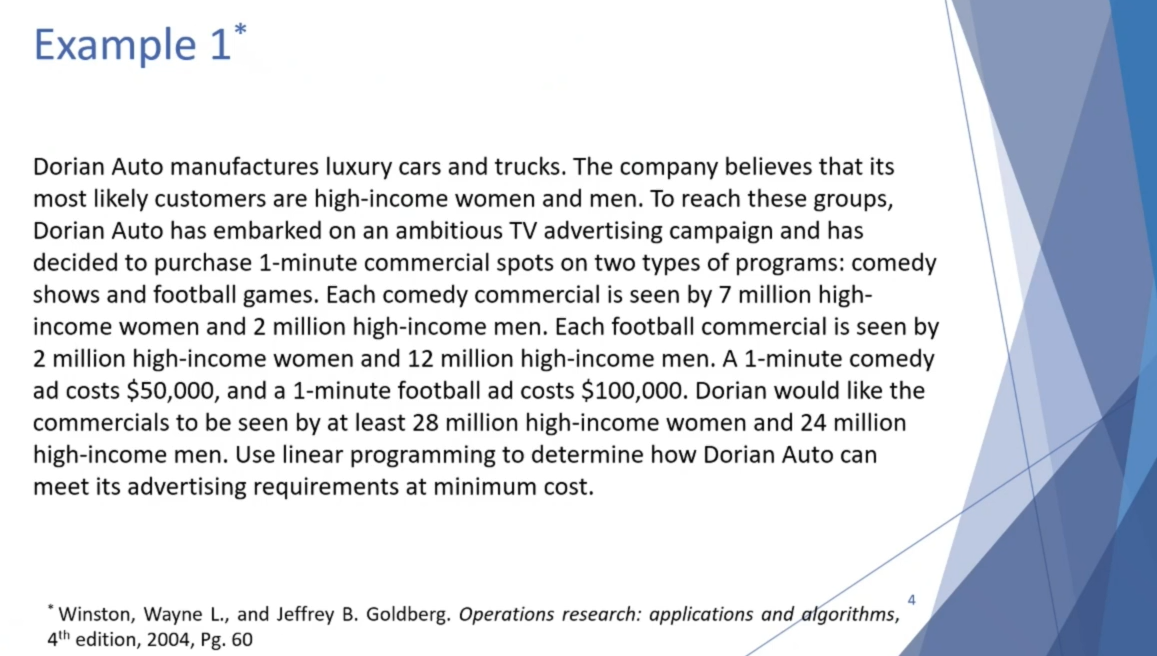

In [15]:
# Defining the model
model = pyo.ConcreteModel()

# Decision Variables
model.x1 = pyo.Var(domain=pyo.NonNegativeReals)
x1 = model.x1
model.x2 = pyo.Var(domain=pyo.NonNegativeReals)
x2 = model.x2

# Objective Function
model.obj = pyo.Objective(expr=x1*50000 + x2*100000, sense=pyo.minimize)

# Constraints
model.const1 = pyo.Constraint(expr = 7*x1 + 2*x2 >= 28, doc = 'Constraint 1')
model.const2 = pyo.Constraint(expr = 2*x1 + 12*x2 >= 24, doc = 'Constraint 2')

# Solve

results = pyo.SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model)

results.write()
print('\n RESULTS \n')
print('Cost of advertisement campaign =', model.obj())
print('Number of comedy ads purchased  =', x1())
print('Number of football ads purchased =', x2())


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 320000.0
  Upper bound: 320000.0
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Number of nonzeros: 5
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.013372182846069336
# ----------------------------------------------------------
#   Solution Information
# ------------------------------